# Basic of cluster analysis

## Import the relevant libararies

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set()

# Load the Data

In [4]:
data = pd.read_csv("3.01. country Clusters.csv")

In [5]:
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


# Plot the data

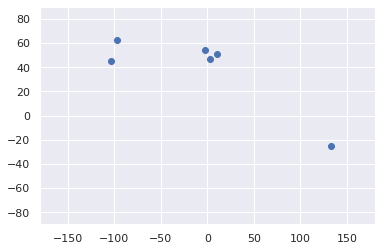

In [6]:
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

# Select the features

In [7]:
x = data.iloc[:,1:3]

In [8]:
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


# Clustering 

In [84]:
kmeans = KMeans(3)

In [85]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [86]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

# Clustering results

In [87]:
i_c = kmeans.fit_predict(x)
i_c

array([0, 0, 2, 0, 1, 0], dtype=int32)

In [88]:
d_w_c = data.copy()

In [89]:
d_w_c['Cluster'] = i_c
d_w_c

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,2
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,0


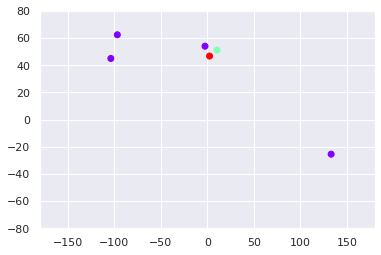

In [90]:
plt.scatter(d_w_c['Longitude'],d_w_c['Latitude'],c=d_w_c['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-80,80)
plt.show()

# Now Categorical Clustering using Langauage feature

In [91]:
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


# Map the data

In [92]:
data_mapped = data.copy()
data_mapped['Language'] = data_mapped['Language'].map({'English':1,'French':0,'German':2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,1
1,Canada,62.40,-96.80,1
2,France,46.75,2.40,0
3,UK,54.01,-2.53,1
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,1


# Select the Features

In [93]:
x = data_mapped.iloc[:,3:4]
x

,Language
0,1
1,1
2,0
3,1
4,2
5,1


# Clustering

In [94]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [95]:
i_c = kmeans.fit_predict(x)

In [96]:
i_c

array([0, 0, 1, 0, 2, 0], dtype=int32)

In [97]:
d_w_c = data.copy()

In [98]:
d_w_c['Cluster'] = i_c

In [99]:
d_w_c

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,2
5,Australia,-25.45,133.11,English,0


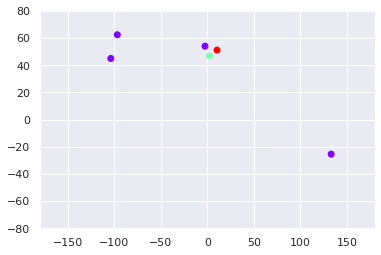

In [100]:
plt.scatter(d_w_c['Longitude'],d_w_c['Latitude'],c=d_w_c['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-80,80)
plt.show()

# Selecting the number of clusters

### WCSS

In [101]:
kmeans.inertia_

0.0

In [103]:
WCSS = []
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    WCSS.append(wcss_iter)
    

/home/radhey/anaconda3/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/radhey/anaconda3/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/radhey/anaconda3/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return_n_iter=True)


In [104]:
WCSS

[2.0, 0.8000000000000002, 0.0, 0.0, 0.0, 0.0]

# The ELbow method

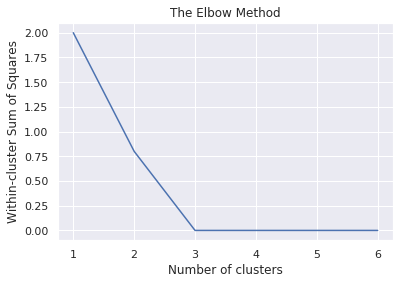

In [105]:
number_cluster = range(1,7)
plt.plot(number_cluster, WCSS)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Within-cluster Sum of Squares")
plt.show()